# AVANCE PROYECTO 2 #

1. El dataset utilizado proviene de Kaggle, del archivo coin_Bitcoin.csv, el cual contiene el historial de precios de la criptomoneda Bitcoin.

- Fuente: https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory?select=coin_Bitcoin.csv 

- Problema de aprendizaje: Serie temporal supervisada para la predicción de precios futuros de Bitcoin, usando deep learning en específico LSTM

- Número de instancias: Aprox. 3000 filas ya filtrado y limpio

- Número de características: 6 columnas, 7 contando el date

Date: Fecha y hora del registro.

Open: Precio de apertura.

High: Precio más alto del día.

Low: Precio más bajo del día.

Close: Precio de cierre.

Volume: Volumen de transacciones diarias.

Market Cap: Capitalización de mercado del día.

Predicción: Close

2. Preprocesamiento:

- converción de columna date para que pandas pueda leer bien
- Eliminación de columnas inecesarias
- Normalización
- Visualización con gráficos

3. No se usó metodos para extracción de caracteristicas, PCA no porque no tiene demasiadas atributos y puedo meter fácilmente las 6 columnas en la arquitectura del LSTM

4. Como se trata de un problema de serie temporal, se mantiene la secuencia crónologica de los datos y los 80% de los datos mas antiguos para el entrenamiento y 20% para la predicción


In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("coin_Bitcoin.csv")

df

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
2986,2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,2990,Bitcoin,BTC,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11


In [57]:
# eliminar columnas no necesarias
df = df.drop(columns=["SNo", "Name", "Symbol"])

# convierto date a formato datetime sino no agara las fechas
df['Date'] = pd.to_datetime(df['Date'])

df

,Date,High,Low,Open,Close,Volume,Marketcap
0,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...
2986,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11


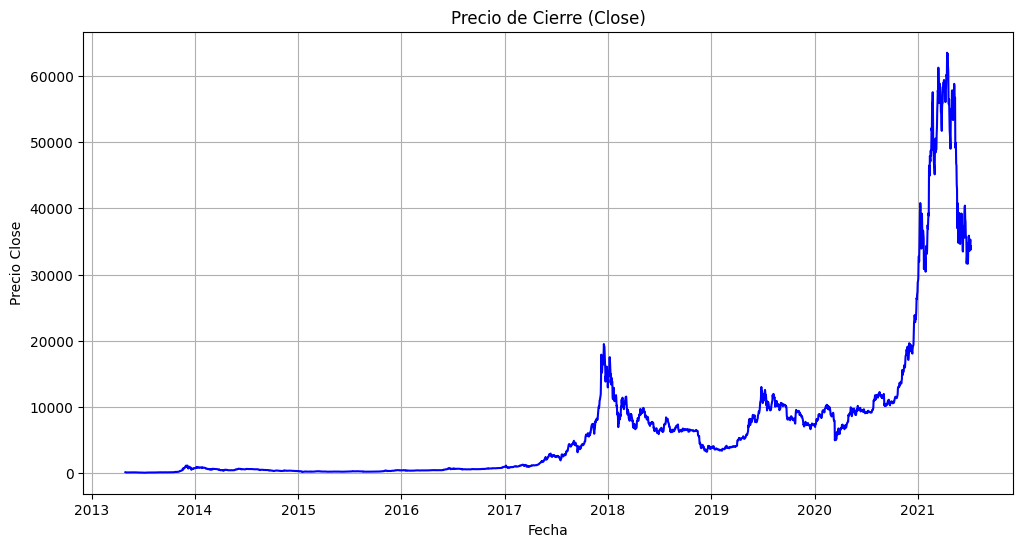

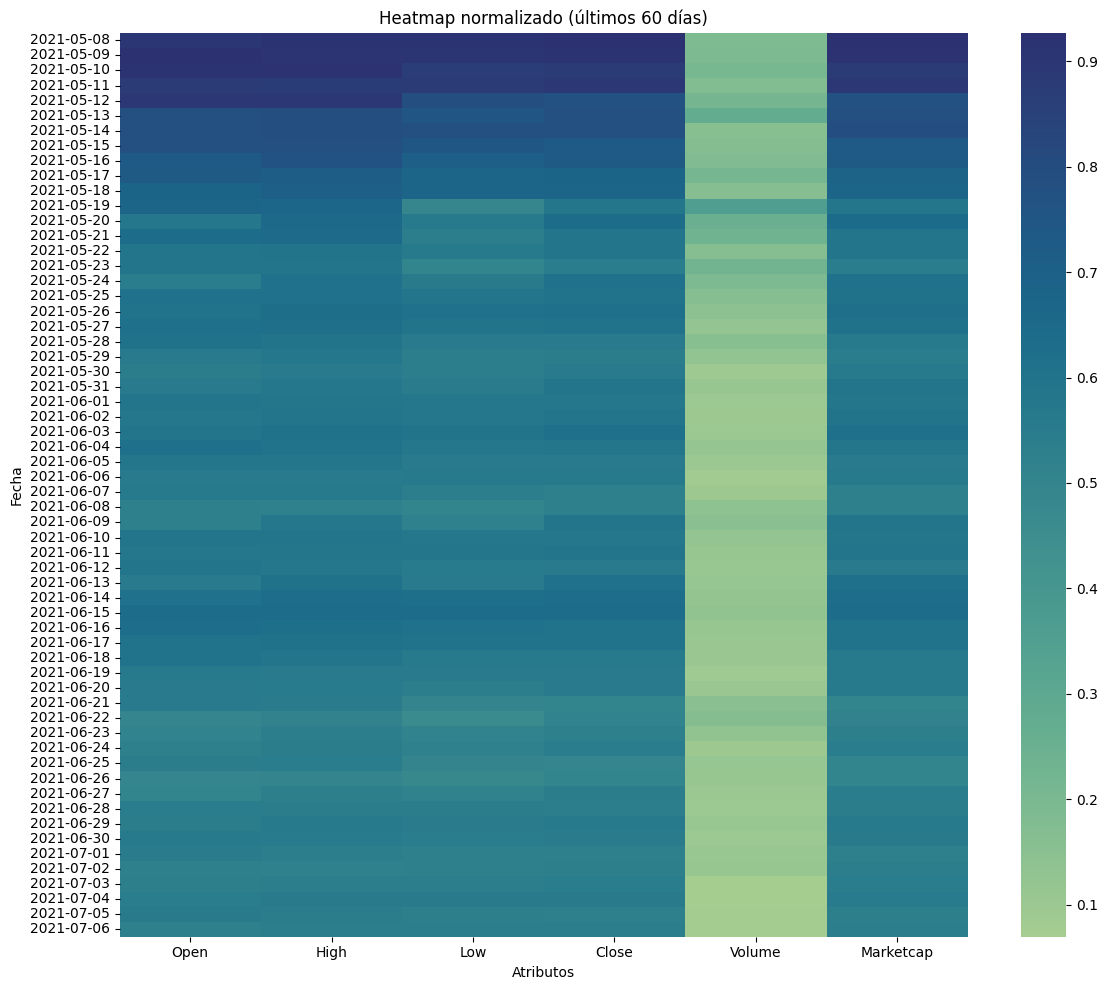

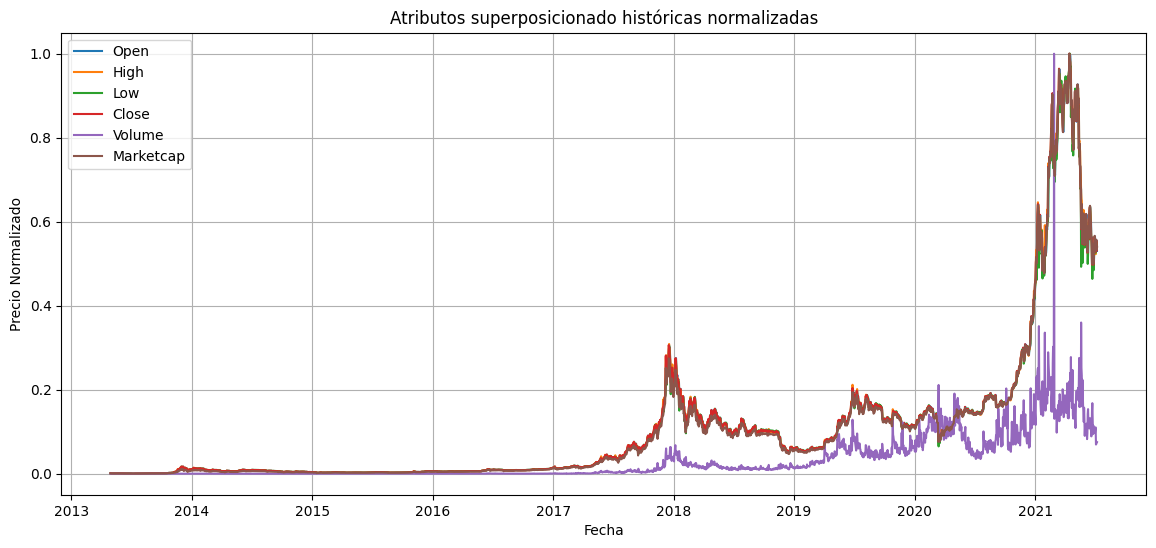

In [58]:
from sklearn.preprocessing import MinMaxScaler

# gráfica Close vs Tiempo
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], color='blue')
plt.title('Precio de Cierre (Close)')
plt.xlabel('Fecha')
plt.ylabel('Precio Close')
plt.grid()
plt.show()

# columnas numéricas a normalizar
columnas_normal = ['Open', 'High', 'Low', 'Close', 'Volume', 'Marketcap']

# normalizar
normalizador = MinMaxScaler()
df[columnas_normal] = normalizador.fit_transform(df[columnas_normal])

# heatmap de los últimos 60 días con fechas
fechas_dias = df.tail(60).copy() #se hace respaldo para no modifcar el dataset real
fechas = fechas_dias['Date'].dt.strftime('%Y-%m-%d')
plt.figure(figsize=(12,10))
sns.heatmap(fechas_dias[columnas_normal], cmap="crest", 
            xticklabels=columnas_normal, yticklabels=fechas)
plt.title("Heatmap normalizado (últimos 60 días)")
plt.xlabel("Atributos")
plt.ylabel("Fecha")
plt.tight_layout()
plt.show()

# gráfico de tendencias históricas superpociocionadas 
plt.figure(figsize=(14,6))
for col in columnas_normal:
    plt.plot(df['Date'], df[col], label=col)
plt.title("Atributos superposicionado históricas normalizadas")
plt.xlabel("Fecha")
plt.ylabel("Precio Normalizado")
plt.legend()
plt.grid()
plt.show()



In [59]:
# guardar ya normalizado

df.to_csv('datos_normalizados.csv', index=False)

df

,Date,High,Low,Open,Close,Volume,Marketcap
0,2013-04-29 23:59:59,0.001126,0.001102,0.001039,0.001200,0.000000,0.000696
1,2013-04-30 23:59:59,0.001117,0.001103,0.001190,0.001112,0.000000,0.000645
2,2013-05-01 23:59:59,0.001008,0.000679,0.001111,0.000765,0.000000,0.000439
3,2013-05-02 23:59:59,0.000788,0.000431,0.000754,0.000580,0.000000,0.000329
4,2013-05-03 23:59:59,0.000518,0.000218,0.000595,0.000462,0.000000,0.000259
...,...,...,...,...,...,...,...
2986,2021-07-02 23:59:59,0.522701,0.526285,0.527633,0.533280,0.110349,0.535324
2987,2021-07-03 23:59:59,0.537668,0.536455,0.532437,0.545442,0.069476,0.547545
2988,2021-07-04 23:59:59,0.553539,0.552447,0.545220,0.555203,0.071016,0.557359
2989,2021-07-05 23:59:59,0.543457,0.533413,0.554971,0.530899,0.076137,0.533001
